## VARMA with Auto Arima

In [2]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller

from sklearn import metrics
from sklearn.model_selection import ParameterGrid

from timeit import default_timer as timer
from dateutil.parser import parse
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv(r'D:\TCC\Microdados_SUS\series_temporais\Dow_Jones_Industrial_Average.csv', parse_dates=True)

columns = ['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']

#Formating date
df.Date = df.Date.apply(lambda x : parse(x))

df.sort_values(by='Date', ascending=True, inplace=True, ignore_index=True)

df = df[['Date','Price','Open','High','Low']]

df[['Price','Open','High','Low']] = df[['Price','Open','High','Low']].apply(lambda x: x.str.replace(',',''))

df[['Price','Open','High','Low']] = df[['Price','Open','High','Low']].apply(pd.to_numeric, errors = 'coerce', axis=1)

In [3]:
#Seleção do período

start_date = datetime(2016,1,14)
end_date = datetime(2017,1,30)

df = df[(df['Date'] > start_date) & (df['Date'] <= end_date)]

date_df = df['Date'].to_list()

df = df.reset_index(drop = True)

df.head(10)

,Date,Price,Open,High,Low
0,2016-01-15,15988.08,16354.33,16354.33,15842.11
1,2016-01-19,16016.02,16009.45,16171.96,15900.25
2,2016-01-20,15766.74,15989.45,15989.45,15450.56
3,2016-01-21,15882.68,15768.87,16038.59,15704.66
4,2016-01-22,16093.51,15921.10,16136.79,15921.10
5,2016-01-25,15885.22,16086.46,16086.46,15880.15
6,2016-01-26,16167.23,15893.16,16185.79,15893.16
7,2016-01-27,15944.46,16168.74,16235.03,15878.30
8,2016-01-28,16069.64,15960.28,16102.14,15863.72
9,2016-01-29,16466.30,16090.26,16466.30,16090.26


In [4]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [5]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [6]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low'], dtype='object')

In [7]:
for name, column in df[['Price','Open','High','Low']].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Price
Test Statistic                  -1.265245
p-value                          0.644919
No Lags Used                     0.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: Open
Test Statistic                  -0.775602
p-value                          0.826184
No Lags Used                     0.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: High
Test Statistic                  -1.238491
p-value                          0.656823
No

In [8]:
X = df[['Price','Open','High','Low']]
train, test = X[0:-30], X[-30:]

In [9]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [10]:
for name, column in train_diff[['Price','Open','High','Low']].iteritems():
    Augmented_Dickey_Fuller_Test_func(train_diff[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Price
Test Statistic                -1.649354e+01
p-value                        2.181228e-29
No Lags Used                   0.000000e+00
Number of Observations Used    2.300000e+02
Critical Value (1%)           -3.459106e+00
Critical Value (5%)           -2.874190e+00
Critical Value (10%)          -2.573512e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: Open
Test Statistic                -1.576959e+01
p-value                        1.165325e-28
No Lags Used                   0.000000e+00
Number of Observations Used    2.300000e+02
Critical Value (1%)           -3.459106e+00
Critical Value (5%)           -2.874190e+00
Critical Value (10%)          -2.573512e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: High
Test Statistic                -1.174075e+01
p-value                        1.27542

In [11]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df): 
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1
    cvts = res.cvt[:, d[str(1-0.05)]]
    def adjust(val, length= 6): 
        return str(val).ljust(length)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [12]:
cointegration_test(train_diff[['Price','Open','High','Low']])

Column Name   >  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Price  >  311.42    > 40.1749   =>   True
Open   >  201.81    > 24.2761   =>   True
High   >  102.08    > 12.3212   =>   True
Low    >  32.3      > 4.1296    =>   True


In [13]:
from pmdarima import auto_arima

In [15]:
pq = []
for name, column in train_diff[[ 'Price','Open','High','Low'  ]].iteritems():
    print(f'Searching order of p and q for : {name}')
    stepwise_model = auto_arima(train_diff[name],start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)
    parameter = stepwise_model.get_params().get('order')
    print(f'optimal order for:{name} is: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))

Searching order of p and q for : Price
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2917.052, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2914.350, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2915.132, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2915.077, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2912.741, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2912.866, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2912.699, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2914.239, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2914.385, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2916.232, Time=0.21 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.685 seconds
optimal order for:Price is: (0, 0, 1) 


Searching order of p and q for : Open
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2890.844, Time=0.

In [16]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns: 
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

In [17]:
pq

[(0, 0, 1), (0, 0, 0), (0, 0, 2), (0, 0, 2)]

In [19]:
df_results_moni = pd.DataFrame(columns=['p', 'q','RMSE_Price','RMSE_Open','RMSE_High','RMSE_Low'])
print('Grid Search Started')
start = timer()
for i in pq:
    if i[0]== 0 and i[2] ==0:
        pass
    else:
        print(f' Running for {i}')
        model = VARMAX(train_diff[['Price','Open','High','Low']], order=(i[0],i[2])).fit( disp=False)
        result = model.forecast(steps = 30)
        inv_res = inverse_diff(df[['Price','Open','High','Low']] , result)
        Opensrmse = np.sqrt(metrics.mean_squared_error(test['Price'], inv_res.Price_1st_inv_diff))
        Highrmse = np.sqrt(metrics.mean_squared_error(test['Open'], inv_res.Open_1st_inv_diff))
        Lowrmse = np.sqrt(metrics.mean_squared_error(test['High'], inv_res.High_1st_inv_diff))
        Closermse = np.sqrt(metrics.mean_squared_error(test['Low'], inv_res.Low_1st_inv_diff))
        df_results_moni = df_results_moni.append({'p': i[0], 'q': i[2], 'RMSE_Price':Opensrmse,'RMSE_Open':Highrmse,'RMSE_High':Lowrmse,'RMSE_Low':Closermse }, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')

Grid Search Started
 Running for (0, 0, 1)
 Running for (0, 0, 2)
 Running for (0, 0, 2)
 Total time taken to complete grid search in seconds: 59.60243290000005


In [21]:
df_results_moni.sort_values(by = ['RMSE_Price','RMSE_Open','RMSE_High','RMSE_Low'] )

,p,q,RMSE_Price,RMSE_Open,RMSE_High,RMSE_Low
0,0.0,1.0,347.886422,311.055889,220.557625,356.602004
1,0.0,2.0,355.272892,293.165793,239.693118,317.621007
2,0.0,2.0,355.272892,293.165793,239.693118,317.621007


In [22]:
# from above example we can see that p=0 and q=2 gives least RMSE
model = VARMAX(train_diff[[ 'Price','Open','High','Low' ]], order=(0,2)).fit( disp=False)
result = model.forecast(steps = 30)

In [23]:
res = inverse_diff(df[['Price','Open','High','Low']],result)

res

,Price,Open,High,Low,Price_1st_inv_diff,Open_1st_inv_diff,High_1st_inv_diff,Low_1st_inv_diff
231,23.214530,-97.651872,-89.973687,0.982067,19994.344530,19930.968128,19938.646313,19871.372067
232,5.569135,19.894792,-5.315803,16.442945,19999.913665,19950.862921,19933.330510,19887.815012
233,16.506740,15.453434,15.470213,16.815519,20016.420405,19966.316354,19948.800723,19904.630531
234,16.506740,15.453434,15.470213,16.815519,20032.927145,19981.769788,19964.270936,19921.446051
235,16.506740,15.453434,15.470213,16.815519,20049.433885,19997.223221,19979.741149,19938.261570
236,16.506740,15.453434,15.470213,16.815519,20065.940625,20012.676655,19995.211362,19955.077089
237,16.506740,15.453434,15.470213,16.815519,20082.447365,20028.130089,20010.681575,19971.892608
238,16.506740,15.453434,15.470213,16.815519,20098.954104,20043.583522,20026.151788,19988.708127
239,16.506740,15.453434,15.470213,16.815519,20115.460844,20059.036956,20041.622001,20005.523646
240,16.506740,15.453434,15.470213,16.815519,20131.967584,20074.490389,20057.092214,20022.339165


In [25]:
for i in ['Price','Open','High','Low' ]:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])

Evaluation metric for Price
Evaluation metric results:-
MSE is : 126218.82805877605
MAE is : 322.85124009298903
RMSE is : 355.2728923782056
MAPE is : 1.6235600310878857
R2 is : -15.660947321935687

Evaluation metric for Open
Evaluation metric results:-
MSE is : 85946.18242107068
MAE is : 257.47056237454126
RMSE is : 293.1657934020794
MAPE is : 1.2947112359356774
R2 is : -13.059374985298172

Evaluation metric for High
Evaluation metric results:-
MSE is : 57452.79080750011
MAE is : 197.72769382860545
RMSE is : 239.69311798109706
MAPE is : 0.9921463984119442
R2 is : -9.32299855934317

Evaluation metric for Low
Evaluation metric results:-
MSE is : 100883.10403287654
MAE is : 270.5595017838088
RMSE is : 317.6210069137061
MAPE is : 1.3653514643790614
R2 is : -10.813537127600089



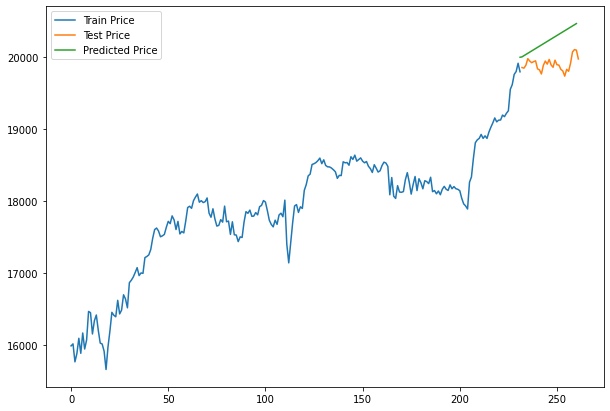

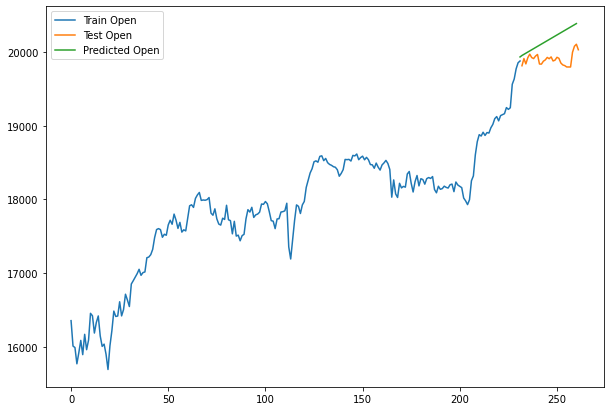

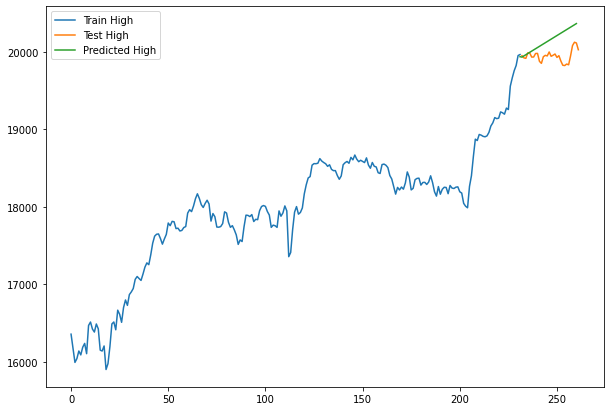

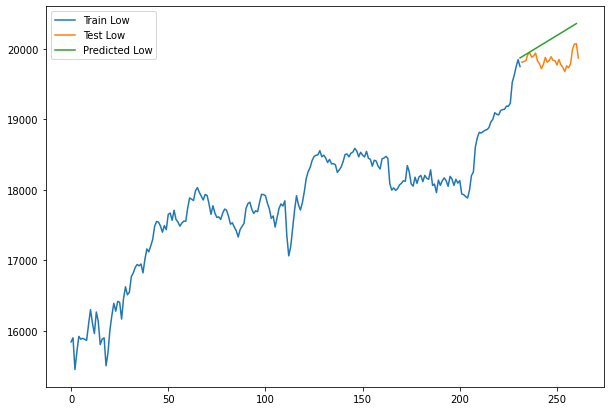

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in ['Price','Open','High','Low' ]:
    
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot( train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()